In [60]:
import pandas as pd

# 데이터 읽어오기
bike = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(bike.shape)

(10886, 12)


In [61]:
# 데이터 확인
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [62]:
# 날짜 데이터를 분리
bike['year'] = pd.to_datetime(bike['datetime']).dt.year
bike['month'] = pd.to_datetime(bike['datetime']).dt.month
bike['day'] = pd.to_datetime(bike['datetime']).dt.day
bike['hour'] = pd.to_datetime(bike['datetime']).dt.hour
bike['minute'] = pd.to_datetime(bike['datetime']).dt.minute
bike['second'] = pd.to_datetime(bike['datetime']).dt.second

bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

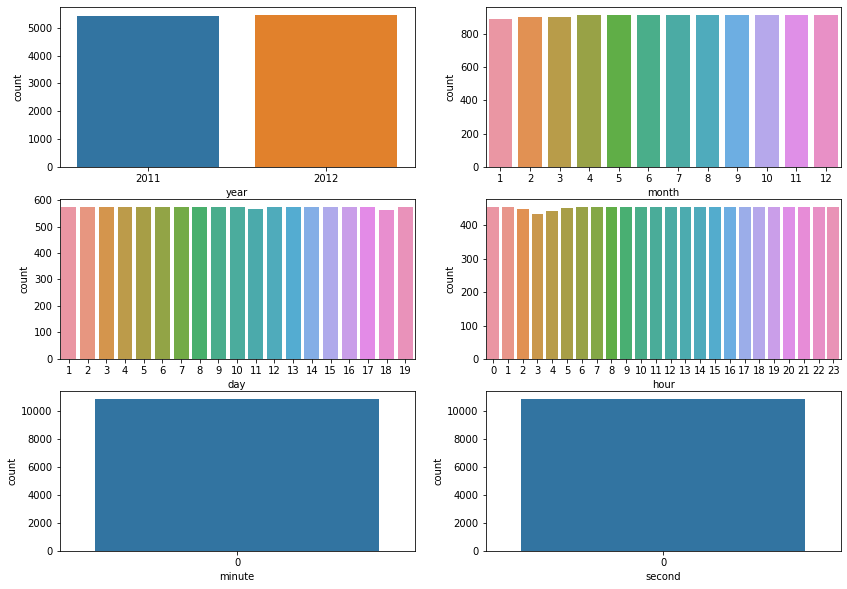

In [64]:
# 년, 월, 일, 시, 분, 초 별로 count값 시각화
plt.figure(figsize=(14, 10))

plt.subplot(3,2,1)
sns.countplot(data=bike, x='year')
plt.subplot(3,2,2)
sns.countplot(data=bike, x='month')
plt.subplot(3,2,3)
sns.countplot(data=bike, x='day')
plt.subplot(3,2,4)
sns.countplot(data=bike, x='hour')
plt.subplot(3,2,5)
sns.countplot(data=bike, x='minute')
plt.subplot(3,2,6)
sns.countplot(data=bike, x='second')

plt.show()

In [65]:
# 선택 가능한 feature 목록 중에서 regression에 사용할 feature 선택
#features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour']
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
target = ['count']

In [66]:
# 데이터를 X, y로 구분
df_X = bike[features]
df_y = bike[target]

In [67]:
from sklearn.model_selection import train_test_split

# 데이터를 train set, test set으로 분리
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=250110)

In [68]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 학습된 모델을 test set을 이용하여 예측
prediction = model.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error
import numpy as np

# mse와 rmse를 계산
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 19259.549746897854, RMSE: 138.77877988690437


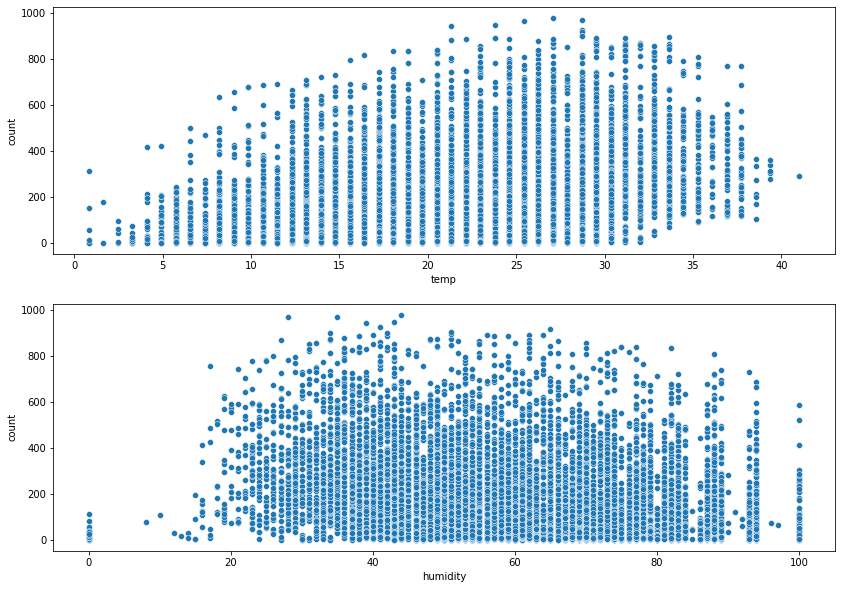

In [70]:
plt.figure(figsize=(14, 10))

# 데이터를 시각화
plt.subplot(2,1,1)
sns.scatterplot(data=bike, x='temp', y='count')

plt.subplot(2,1,2)
sns.scatterplot(data=bike, x='humidity', y='count')
plt.show()

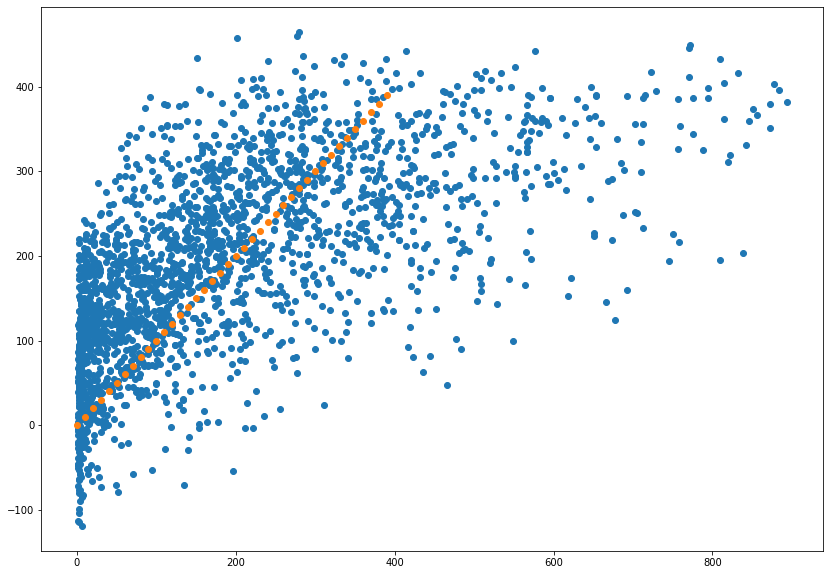

In [71]:
# 결과를 시각화, one은 truth와 prediction이 완전히 일치했을 때의 그래프
plt.figure(figsize=(14, 10))

one = np.arange(0, 400, 10.0)
plt.scatter(y_test, prediction)
plt.scatter(one, one)

plt.show()